In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import os
import pywt

Using TensorFlow backend.
C:\Users\KIIT\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.utils import to_categorical

In [3]:
trainset=pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/TrainingSet.xlsx" , names =['vale1','vale2','vale3','vale4','vale5','vale6','vale7','vale8','vale9','vale10'])
trainlab=pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/Training Label.xlsx" , names = ['labels'])

In [4]:
trainset.insert(10 ,'labels' , trainlab)

In [5]:
trainset.shape                   

(17740, 11)

In [6]:
testset =pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/TestingSet.xlsx", names =['vale1','vale2','vale3','vale4','vale5','vale6','vale7','vale8','vale9','vale10'])
testlab =pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/Testing Label.xlsx", names = ['labels' ,'n','n','n','n','n','n'])

In [7]:
data =pd.read_excel(r"C:\Users\KIIT\Desktop\Dataset\Feature Extraction\Data.xlsx")

In [8]:
datalabels =pd.read_excel(r"C:/Users/KIIT/Desktop/Dataset/Feature Extraction/DataTarget.xlsx" , names = ['labels'])

In [9]:
data_new = data.values

In [10]:
data_new.shape

(26199, 252)

In [11]:
features = np.zeros((data_new.shape[0] , 10))

In [12]:
for i in range(data_new.shape[0]):
    c1,c2,c3,c4,c5,c6 = pywt.wavedec(data_new[i] , 'db2' , level = 5)
    features[i] = c1

In [13]:
features

array([[-0.01693988, -0.06242895,  0.42723719, ..., -0.36325445,
         0.21192443,  0.0053735 ],
       [-0.04417937, -0.07050248,  0.45879571, ..., -0.29231869,
         0.15261159, -0.01807312],
       [-0.07398974, -0.11061738,  0.42422632, ..., -0.35407505,
         0.16527052,  0.05116417],
       ...,
       [ 0.8910666 ,  0.80407291, -0.97728883, ...,  2.28311289,
        -0.3528441 ,  0.27655481],
       [ 1.09324205,  1.04910019, -0.502545  , ...,  1.88387412,
        -0.44220315,  0.53649295],
       [ 0.54026873,  0.4139315 , -0.56594744, ...,  2.44451446,
        -0.80185915,  0.29085863]])

In [14]:
data_new = pd.DataFrame(features , columns = ['vale1','vale2','vale3','vale4','vale5','vale6','vale7','vale8','vale9','vale10'])

In [15]:
data_new

,vale1,vale2,vale3,vale4,vale5,vale6,vale7,vale8,vale9,vale10
0,-0.016940,-0.062429,0.427237,-0.168504,0.870262,-0.457414,-0.414605,-0.363254,0.211924,0.005373
1,-0.044179,-0.070502,0.458796,-0.295285,0.883475,-0.489662,-0.374260,-0.292319,0.152612,-0.018073
2,-0.073990,-0.110617,0.424226,-0.220862,0.917600,-0.461552,-0.368413,-0.354075,0.165271,0.051164
3,-0.136776,-0.155506,0.426463,-0.319412,1.047077,-0.430115,-0.312026,-0.532689,0.037082,0.165734
4,-0.035413,-0.059668,0.451801,-0.415346,1.225906,-0.546019,-0.442437,-0.392364,0.156096,0.073671
...,...,...,...,...,...,...,...,...,...,...
26194,0.433634,0.324848,-0.359698,-1.645828,6.579217,-3.959682,-3.291588,2.418088,0.576415,0.232703
26195,-0.474549,-0.612765,-0.365238,-1.782751,7.523801,-4.396653,-3.903505,1.941340,0.565981,-0.204207
26196,0.891067,0.804073,-0.977289,-2.093795,4.783456,-3.472962,-1.947709,2.283113,-0.352844,0.276555
26197,1.093242,1.049100,-0.502545,-1.653316,7.614827,-3.859878,-3.180268,1.883874,-0.442203,0.536493


In [16]:
data_new.insert(10 ,'labels' , datalabels)

In [17]:
testlab=testlab.drop(columns=testlab.columns[[1,2,3,4,5,6]], axis=1)
testset.insert(10 ,'labels' , testlab)

In [18]:
dataset = pd.concat( [ trainset, testset ], ignore_index= True )

In [19]:
dataset

,vale1,vale2,vale3,vale4,vale5,vale6,vale7,vale8,vale9,vale10,labels
0,-0.132753,-0.163220,0.298510,-0.386726,0.934570,-0.386188,-0.292001,-0.211995,0.197731,-0.007056,1
1,-0.196359,-0.214179,0.295062,-0.257458,0.937696,-0.357075,-0.319707,-0.473274,0.159579,0.022640,1
2,-0.077665,-0.108193,0.374364,-0.218162,0.993907,-0.400560,-0.379472,-0.504703,0.209512,0.075953,1
3,-0.099537,-0.132895,0.315553,-0.334031,1.171973,-0.488372,-0.408483,-0.416131,0.057927,0.196741,1
4,-0.093664,-0.126818,0.277582,-0.362626,1.325761,-0.446401,-0.309932,-0.527190,-0.033661,0.207670,1
...,...,...,...,...,...,...,...,...,...,...,...
27307,0.433634,0.324848,-0.359698,-1.645828,6.579217,-3.959682,-3.291588,2.418088,0.576415,0.232703,8
27308,-0.474549,-0.612765,-0.365238,-1.782751,7.523801,-4.396653,-3.903505,1.941340,0.565981,-0.204207,8
27309,0.891067,0.804073,-0.977289,-2.093795,4.783456,-3.472962,-1.947709,2.283113,-0.352844,0.276555,8
27310,1.093242,1.049100,-0.502545,-1.653316,7.614827,-3.859878,-3.180268,1.883874,-0.442203,0.536493,8


In [20]:
dataset  = pd.concat([dataset,data_new], ignore_index = True)

In [21]:
dataset = dataset.drop_duplicates(ignore_index = True)

In [22]:
dataset.to_csv("C:/Users/KIIT/Dataset/Classification_Dataset/ECG_dataset.csv" , index = False)

In [23]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,52822,52823,52824,52825,52826,52827,52828,52829,52830,52831
vale1,-0.132753,-0.196359,-0.077665,-0.099537,-0.093664,-0.071074,-0.069871,-0.068963,-0.066107,-0.088034,...,0.925021,0.128121,0.842379,0.889951,1.286406,0.433634,-0.474549,0.891067,1.093242,0.540269
vale2,-0.163220,-0.214179,-0.108193,-0.132895,-0.126818,-0.101462,-0.111972,-0.118867,-0.108463,-0.098137,...,0.850751,0.028744,0.776540,0.807778,1.226155,0.324848,-0.612765,0.804073,1.049100,0.413931
vale3,0.298510,0.295062,0.374364,0.315553,0.277582,0.300357,0.279140,0.283830,0.281386,0.328374,...,-0.209397,-0.907709,-0.782089,-0.608036,-0.127220,-0.359698,-0.365238,-0.977289,-0.502545,-0.565947
vale4,-0.386726,-0.257458,-0.218162,-0.334031,-0.362626,-0.290092,-0.201363,-0.210582,-0.209719,-0.358000,...,-1.491101,-1.979754,-1.053865,-1.602892,-1.309071,-1.645828,-1.782751,-2.093795,-1.653316,-1.874090
vale5,0.934570,0.937696,0.993907,1.171973,1.325761,1.024788,1.004114,0.929242,0.961061,1.118687,...,5.355124,10.079333,8.379983,9.740977,4.826630,6.579217,7.523801,4.783456,7.614827,4.217904
vale6,-0.386188,-0.357075,-0.400560,-0.488372,-0.446401,-0.406208,-0.442503,-0.374093,-0.337995,-0.433385,...,-3.207576,-4.391267,-4.055023,-5.468199,-3.648789,-3.959682,-4.396653,-3.472962,-3.859878,-3.251133
vale7,-0.292001,-0.319707,-0.379472,-0.408483,-0.309932,-0.348910,-0.355022,-0.325621,-0.305571,-0.340641,...,-1.927265,-4.520759,-3.860801,-4.876966,-1.973180,-3.291588,-3.903505,-1.947709,-3.180268,-1.261802
vale8,-0.211995,-0.473274,-0.504703,-0.416131,-0.527190,-0.428371,-0.330224,-0.323518,-0.507315,-0.402243,...,1.952747,1.084364,1.382937,1.345360,2.327285,2.418088,1.941340,2.283113,1.883874,2.444514
vale9,0.197731,0.159579,0.209512,0.057927,-0.033661,0.195205,0.168673,0.163830,0.168188,0.209406,...,-0.648983,0.593672,-0.414884,0.215661,-0.619188,0.576415,0.565981,-0.352844,-0.442203,-0.801859
vale10,-0.007056,0.022640,0.075953,0.196741,0.207670,0.062890,0.017634,-0.041561,0.087584,0.078348,...,0.325660,-0.323231,1.085468,1.190379,0.483290,0.232703,-0.204207,0.276555,0.536493,0.290859


In [24]:
dataset['labels'].value_counts()

1    18637
5    10037
2     9851
3     8091
4     2019
6     1638
7     1464
8     1095
Name: labels, dtype: int64

In [25]:
dataset = dataset.sample(frac=1)   #df.sample shuffles the dataset, frac=1 means we take whole dataset as sample

In [26]:
dataset

,vale1,vale2,vale3,vale4,vale5,vale6,vale7,vale8,vale9,vale10,labels
13422,-0.066515,-0.066422,-0.251087,-0.467818,1.705293,-2.657268,-0.956468,0.792425,1.381494,0.610952,5
48152,-0.211244,-0.208748,-0.313692,-0.490220,1.198464,-2.226482,-0.094891,0.559834,1.110742,0.404997,5
46409,-0.325054,-0.327641,-0.266213,-0.319480,0.675427,-0.842463,-0.126284,1.197670,0.246991,-0.350673,4
6264,-0.273603,-0.286899,-0.156696,-0.703306,1.970714,-0.450004,-0.151691,0.464730,-0.035690,-0.203669,1
5785,-0.315113,-0.332973,-0.222359,-0.715177,2.216083,-0.308035,-0.103014,0.472735,-0.074622,-0.359754,1
...,...,...,...,...,...,...,...,...,...,...,...
20879,0.960810,0.949262,-0.451521,-0.884590,5.233772,-2.542295,-1.896227,-1.375269,0.681758,0.748089,2
17677,-0.102882,-0.139202,0.368670,-0.280475,1.116937,-0.441572,-0.357041,-0.410660,0.148880,-0.047904,1
16382,-0.299820,-0.279402,-0.101011,-0.773887,3.573543,-0.378226,-1.137868,-0.954822,0.116209,-0.088614,7
40840,-0.426805,-0.449610,-0.144142,-1.007857,5.061303,-0.300431,-1.743748,-1.304045,0.015687,-0.174293,2


In [27]:
y = dataset.pop('labels').values

In [28]:
x = dataset.values

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.30, random_state=1) # 60-40 split
x_test, x_val, y_test, y_val  = train_test_split(x_test, y_test, test_size=0.50, random_state=1)  #50-50 split on 40% of data
    

## TRANNING TESTING AND VALIDATION SPLIT

In [30]:
print(('features',x_train.shape,'labels',y_train.shape))                 #Tranning set size
print('Label Name ' , 'Count')
print(np.array(np.unique(y_train, return_counts=True)).T)


('features', (36982, 10), 'labels', (36982,))
Label Name  Count
[[    1 13025]
 [    2  6866]
 [    3  5658]
 [    4  1456]
 [    5  7012]
 [    6  1154]
 [    7  1043]
 [    8   768]]


In [31]:
print(('features',x_val.shape,'labels',y_val.shape))                 #Validation set size
print('Label Name ' , 'Count')
print(np.array(np.unique(y_val, return_counts=True)).T)

('features', (7925, 10), 'labels', (7925,))
Label Name  Count
[[   1 2828]
 [   2 1469]
 [   3 1236]
 [   4  294]
 [   5 1503]
 [   6  238]
 [   7  193]
 [   8  164]]


In [32]:
print(('features',x_test.shape,'labels',y_test.shape))                 #Test set size
print('Label Name ' , 'Count')
print(np.array(np.unique(y_test, return_counts=True)).T)

('features', (7925, 10), 'labels', (7925,))
Label Name  Count
[[   1 2784]
 [   2 1516]
 [   3 1197]
 [   4  269]
 [   5 1522]
 [   6  246]
 [   7  228]
 [   8  163]]


## MLP MODEL

In [33]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras_utils import reset_tf_session
import keras_utils
from sklearn.metrics import accuracy_score


In [34]:
#------MLP-----#
s = reset_tf_session
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=(10,)))
model.add(Dense(40,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 369       
Total params: 2,449
Trainable params: 2,449
Non-trainable params: 0
_________________________________________________________________


In [36]:
 model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [37]:
# Training
history = model.fit(x_train, y_train ,batch_size=32,  epochs=15, validation_data=(x_val, y_val),  callbacks=[keras_utils.TqdmProgressCallback()], verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/15








Epoch 2/15




Epoch 3/15




Epoch 4/15




Epoch 5/15




Epoch 6/15




Epoch 7/15




Epoch 8/15




Epoch 9/15




Epoch 10/15




Epoch 11/15




Epoch 12/15




Epoch 13/15




Epoch 14/15




Epoch 15/15


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


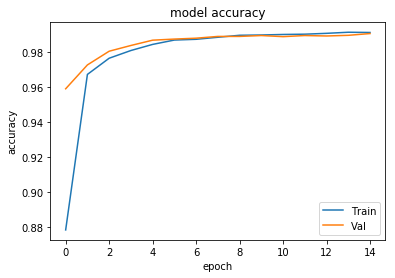

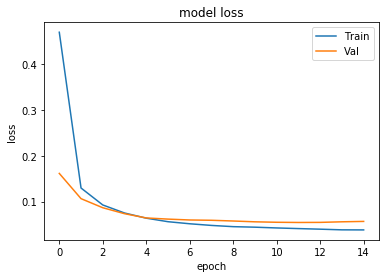

In [38]:
## Learning curve for MLP ##

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [39]:
y_pred = model.predict_classes(x_test,batch_size=32)
acc_test = accuracy_score(y_test, y_pred)

6976/7925 [=========================>....] - ETA:  - ETA:  - ETA:  - ETA: 0s

## CONVOLUTIONAL MODEL

In [40]:
from keras.layers import Conv1D,Dropout,MaxPooling1D,Flatten

In [41]:
#------CNN-----#
s = reset_tf_session
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10,1)))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(40, activation='relu'))
model_cnn.add(Dense(9, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [42]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 64)             256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 64)             12352     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 64)             12352     
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                10280     
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 369       
Total params: 35,609
Trainable params: 35,609
Non-trainable params: 0
_________________________________________________________________


In [43]:
 model_cnn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
x_train_cnn =np.expand_dims(x_train,axis=-1)
x_val_cnn =np.expand_dims(x_val,axis=-1)
x_test_cnn =np.expand_dims(x_test,axis=-1)

In [45]:
x_train_cnn.shape

(36982, 10, 1)

In [46]:
history_cnn = model_cnn.fit(x_train_cnn, y_train ,batch_size=32,  epochs=15, validation_data=(x_val_cnn, y_val),  callbacks=[keras_utils.TqdmProgressCallback()], verbose=0)


Epoch 1/15




Epoch 2/15




Epoch 3/15




Epoch 4/15




Epoch 5/15




Epoch 6/15




Epoch 7/15




Epoch 8/15




Epoch 9/15




Epoch 10/15




Epoch 11/15




Epoch 12/15




Epoch 13/15




Epoch 14/15




Epoch 15/15


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


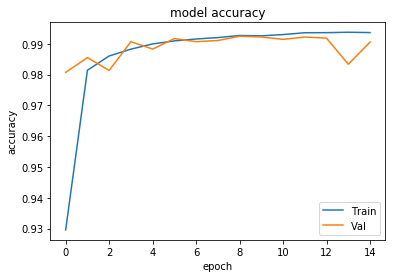

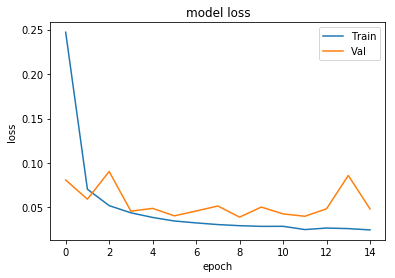

In [47]:
#-- CNN tranning curve -- #

print(history_cnn.history.keys())
# summarize history for accuracy
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [48]:
y_pred_cnn = model_cnn.predict_classes(x_test_cnn,batch_size=32)
acc_test_cnn = accuracy_score(y_test, y_pred_cnn)

7925/7925 [==============================] - ETA: 17 - ETA: 0 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s     


## BIDIRECTIONAL LSTM MODEL

In [49]:
from keras.layers import Bidirectional, LSTM , TimeDistributed

In [50]:
#---- LSTM -----#
s = reset_tf_session()
model_rnn = Sequential()
model_rnn.add(Bidirectional(LSTM(64 , return_sequences = True, input_shape = (x_train.shape[0] , x_train.shape[1])) , input_shape = (10,1)))
model_rnn.add(Flatten())
model_rnn.add(Dense(9, activation = 'softmax'))



Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [51]:
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 10, 128)           33792     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 11529     
Total params: 45,321
Trainable params: 45,321
Non-trainable params: 0
_________________________________________________________________


In [52]:
 model_rnn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Training
history_rnn = model_rnn.fit(x_train_cnn, y_train ,batch_size=32,  epochs=15, validation_data=(x_val_cnn, y_val),  callbacks=[keras_utils.TqdmProgressCallback()], verbose=0)


Epoch 1/15




Epoch 2/15




Epoch 3/15




Epoch 4/15




Epoch 5/15




Epoch 6/15




Epoch 7/15




Epoch 8/15




Epoch 9/15




Epoch 10/15




Epoch 11/15




Epoch 12/15




Epoch 13/15




Epoch 14/15




Epoch 15/15


RNN curves
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


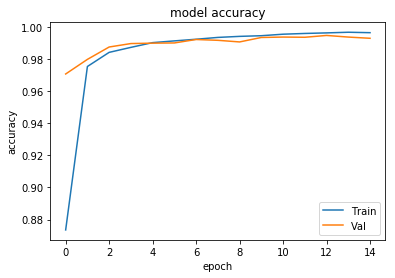

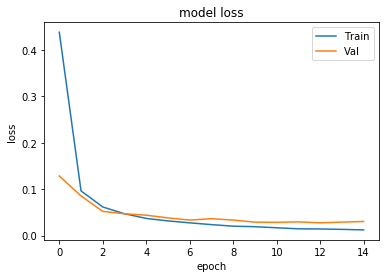

In [54]:
#-- RNN tranning curve -- #
print('RNN curves')
print(history_rnn.history.keys())
# summarize history for accuracy
plt.plot(history_rnn.history['acc'])
plt.plot(history_rnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [55]:
#from keras.models import model_from_json

In [56]:
#model_json = model_cnn.to_json()
#with open("model_cnn.json", "w") as json_file:
#   json_file.write(model_json)
#model_cnn.save_weights("model_cnn.h5")

In [57]:
#model_cnn.save('model_cnn.h5')

In [58]:
#model_rnn.save('model_rnn.h5')

In [59]:
y_pred_rnn = model_rnn.predict_classes(x_test_cnn,batch_size=32)
acc_test_rnn = accuracy_score(y_test, y_pred_rnn)

7925/7925 [==============================] - ETA: 47 - ETA: 5 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s     


## RESULTS

In [60]:
print("Test set accuracy with MLP: {:.5f}".format(acc_test))

Test set accuracy with MLP: 0.99016


In [61]:
print("Test set accuracy with CNN: {:.5f}".format(acc_test_cnn))

Test set accuracy with CNN: 0.99243


In [62]:
print("Test set accuracy with RNN: {:.5f}".format(acc_test_rnn))

Test set accuracy with RNN: 0.99546


In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix MLP\n')
print(confusion)

Confusion Matrix MLP

[[2778    0    0    4    1    0    0    1]
 [   5 1504    2    2    2    0    0    1]
 [   0    0 1195    1    0    0    1    0]
 [   2    5    2  256    3    0    1    0]
 [   3    0    0    1 1506    1   11    0]
 [   1    3    0    1    1  236    2    2]
 [   3    0    2    0    6    0  216    1]
 [   0    1    0    3    0    3    0  156]]


In [65]:
confusion_cnn = confusion_matrix(y_test, y_pred_cnn)
print('Confusion Matrix CNN\n')
print(confusion_cnn)

Confusion Matrix CNN

[[2782    0    0    2    0    0    0    0]
 [   2 1512    0    0    1    0    0    1]
 [   0    0 1190    1    5    0    1    0]
 [   2    8    0  256    3    0    0    0]
 [   3    0    0    0 1515    1    3    0]
 [   1    2    0    4    5  232    0    2]
 [   1    1    0    1    4    0  221    0]
 [   0    0    0    1    2    3    0  157]]


In [66]:
confusion_rnn = confusion_matrix(y_test, y_pred_rnn)
print('Confusion Matrix RNN\n')
print(confusion_rnn)

Confusion Matrix RNN

[[2782    0    0    1    0    0    1    0]
 [   1 1514    0    0    1    0    0    0]
 [   0    0 1196    0    0    0    1    0]
 [   0    7    0  260    2    0    0    0]
 [   2    0    0    0 1513    0    7    0]
 [   0    3    2    2    0  237    0    2]
 [   1    0    0    0    2    0  225    0]
 [   0    0    0    0    0    0    1  162]]


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

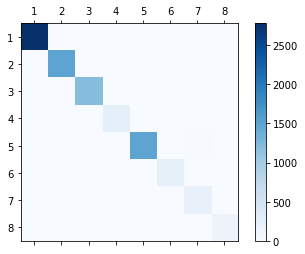

In [67]:
#---- MLP confusion matrix  ----#

xlab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
ylab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
fig = plt.figure()
conf_img = fig.add_subplot(111)
confusion_matrix = conf_img.matshow(confusion , cmap=plt.cm.Blues )
fig.colorbar(confusion_matrix)
conf_img.set_xticklabels(xlab)
conf_img.set_yticklabels(ylab)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

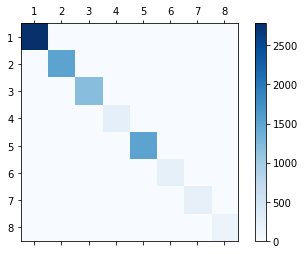

In [68]:
##---- CNN confusion matrix  ---#

xlab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
ylab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
fig = plt.figure()
conf_img = fig.add_subplot(111)
confusion_matrix = conf_img.matshow(confusion_cnn , cmap=plt.cm.Blues )
fig.colorbar(confusion_matrix)
conf_img.set_xticklabels(xlab)
conf_img.set_yticklabels(ylab)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

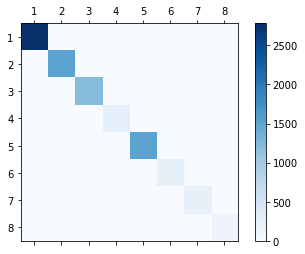

In [69]:
##---- RNN confusion matrix  ---#

xlab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
ylab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
fig = plt.figure()
conf_img = fig.add_subplot(111)
confusion_matrix = conf_img.matshow(confusion_rnn , cmap=plt.cm.Blues )
fig.colorbar(confusion_matrix)
conf_img.set_xticklabels(xlab)
conf_img.set_yticklabels(ylab)

In [70]:
FP = confusion.sum(axis=0) - np.diag(confusion) 
FN = confusion.sum(axis=1) - np.diag(confusion)
TP = np.diag(confusion)
TN = confusion.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

sensitivity = TP/(TP+FN)        # Sensitivity

specificty = TN/(TN+FP)         # Specificity

ACC = (TP+TN)/(TP+FP+FN+TN)     # Overall accuracy for each class

In [71]:
sensitivity

array([0.99784483, 0.99208443, 0.99832916, 0.95167286, 0.98948752,
       0.95934959, 0.94736842, 0.95705521])

In [72]:
specificty

array([0.99727679, 0.99859572, 0.9991082 , 0.9984326 , 0.9979697 ,
       0.9994791 , 0.99805119, 0.99935584])

In [73]:
ACC

array([0.99747634, 0.99735016, 0.99899054, 0.99684543, 0.99634069,
       0.99823344, 0.99659306, 0.9984858 ])

In [74]:
print('MLP average Accuracy',ACC.sum()/8)

MLP average Accuracy 0.9975394321766562


In [75]:
FP = confusion_cnn.sum(axis=0) - np.diag(confusion_cnn) 
FN = confusion_cnn.sum(axis=1) - np.diag(confusion_cnn)
TP = np.diag(confusion_cnn)
TN = confusion_cnn.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

sensitivity = TP/(TP+FN)        # Sensitivity

specificty = TN/(TN+FP)         # Specificity

ACC = (TP+TN)/(TP+FP+FN+TN)     # Overall accuracy for each class

In [76]:
print(sensitivity)

[0.99928161 0.99736148 0.99415205 0.95167286 0.99540079 0.94308943
 0.96929825 0.96319018]


In [77]:
specificty

array([0.99824937, 0.99828366, 1.        , 0.99882445, 0.99687646,
       0.9994791 , 0.99948032, 0.9996135 ])

In [78]:
ACC

array([0.99861199, 0.99810726, 0.99911672, 0.99722397, 0.99659306,
       0.99772871, 0.99861199, 0.99886435])

In [79]:
print('CNN average Accuracy',ACC.sum()/8)

CNN average Accuracy 0.9981072555205047


In [80]:
FP = confusion_rnn.sum(axis=0) - np.diag(confusion_rnn) 
FN = confusion_rnn.sum(axis=1) - np.diag(confusion_rnn)
TP = np.diag(confusion_rnn)
TN = confusion_rnn.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

sensitivity = TP/(TP+FN)        # Sensitivity

specificty = TN/(TN+FP)         # Specificity

ACC = (TP+TN)/(TP+FP+FN+TN)     # Overall accuracy for each class

In [81]:
print(sensitivity)

[0.99928161 0.99868074 0.99916458 0.96654275 0.99408673 0.96341463
 0.98684211 0.99386503]


In [82]:
specificty

array([0.99922194, 0.99843969, 0.99970273, 0.99960815, 0.99921912,
       1.        , 0.99870079, 0.99974233])

In [83]:
ACC

array([0.9992429 , 0.9984858 , 0.99962145, 0.9984858 , 0.99823344,
       0.99886435, 0.99835962, 0.99962145])

In [84]:
print('RNN average Accuracy',ACC.sum()/8)

RNN average Accuracy 0.9988643533123029
